we have two flat files to analyze: order.csv and menu_items.csv. we need to use both to the fllowing questions.
1. what items drive the most and least revenue?
2. which time periods have the highest and lowest revenue?

In [48]:
import pandas as pd

In [49]:
order_df=pd.read_csv(r"/order_details.csv")

In [50]:
order_df.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0


In [51]:
order_df.tail(10)

,order_details_id,order_id,order_date,order_time,item_id
12224,12225,5367,3/31/23,9:58:06 PM,119.0
12225,12226,5368,3/31/23,9:58:47 PM,101.0
12226,12227,5368,3/31/23,9:58:47 PM,128.0
12227,12228,5368,3/31/23,9:58:47 PM,113.0
12228,12229,5368,3/31/23,9:58:47 PM,118.0
12229,12230,5369,3/31/23,10:05:04 PM,109.0
12230,12231,5369,3/31/23,10:05:04 PM,129.0
12231,12232,5369,3/31/23,10:05:04 PM,120.0
12232,12233,5369,3/31/23,10:05:04 PM,122.0
12233,12234,5370,3/31/23,10:15:48 PM,122.0


In [52]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB


Cleaning up missing rows

In [53]:
order_df.dropna(inplace=True)

In [54]:
order_df=order_df.dropna()

Joining menu_items


In [55]:
menu_df=pd.read_csv(r"/menu_items.csv")

In [56]:
menu_df.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [57]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [58]:
order_items_df = order_df.merge(menu_df, how="left", left_on="item_id", right_on = "menu_item_id").drop("menu_item_id", axis=1)
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124.0,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50


Adding tax & total revenue columns

In [59]:
order_items_df["sales_tax"] = (order_items_df["price"] * 0.08).round(2)
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax
0,1,1,1/1/23,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44
1,2,2,1/1/23,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16
2,3,2,1/1/23,11:57:40 AM,124.0,Spaghetti,Italian,14.50,1.16
3,4,2,1/1/23,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95,1.04
4,5,2,1/1/23,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50,1.24


In [60]:
order_items_df["total_revenue"] = order_items_df.price + order_items_df["sales_tax"].round(2)
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue
0,1,1,1/1/23,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2,2,1/1/23,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,3,2,1/1/23,11:57:40 AM,124.0,Spaghetti,Italian,14.50,1.16,15.66
3,4,2,1/1/23,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
4,5,2,1/1/23,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74


In [62]:
order_items_df.describe()

,order_details_id,order_id,item_id,price,sales_tax,total_revenue
count,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,115.202282,13.161767,1.055128,14.216895
std,3531.337208,1545.826452,9.387580,3.986392,0.320078,4.306466
min,1.000000,1.000000,101.000000,5.000000,0.400000,5.400000
25%,3064.000000,1353.000000,107.000000,10.500000,0.840000,11.340000
50%,6119.000000,2711.000000,114.000000,13.950000,1.120000,15.070000
75%,9175.000000,4020.000000,123.000000,16.500000,1.320000,17.820000
max,12234.000000,5370.000000,132.000000,19.950000,1.600000,21.550000


Applying filtering, sorting, aggregation methods.

analyzing best & worst selling items


In [63]:
(order_items_df.groupby("item_name")
 .agg({"total_revenue": "sum"})
.sort_values("total_revenue", ascending=False))

,total_revenue
item_name,
Korean Beef Bowl,11401.32
Spaghetti & Meatballs,9113.30
Tofu Pad Thai,8800.92
Cheeseburger,8785.81
Hamburger,8701.78
Orange Chicken,8125.92
Eggplant Parmesan,7690.20
Steak Torta,7369.23
Chicken Parmesan,7057.96


visualize data with charts & graphs

<Axes: ylabel='item_name'>

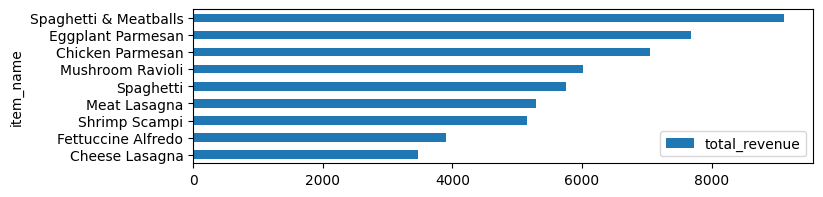

In [64]:
(order_items_df.query("category == 'Italian'")
 .groupby("item_name")
 .agg({"total_revenue": "sum"})
 .sort_values("total_revenue")).plot(kind="barh", figsize=(8,2))

<Axes: ylabel='item_name'>

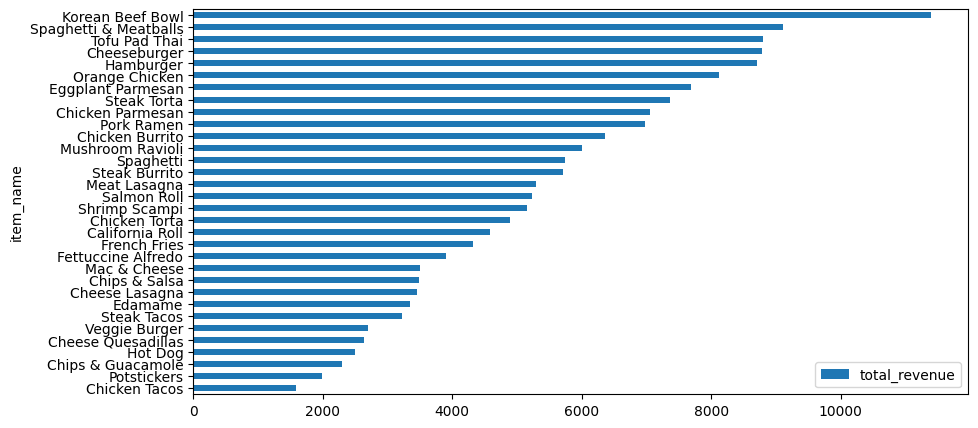

In [65]:
(order_items_df
 .groupby("item_name")
 .agg({"total_revenue": "sum"})
 .sort_values("total_revenue")).plot(kind="barh", figsize=(10,5))

In [66]:
print(order_items_df.columns)

Index(['order_details_id', 'order_id', 'order_date', 'order_time', 'item_id',
       'item_name', 'category', 'price', 'sales_tax', 'total_revenue'],
      dtype='object')


analyzing busiest times

<ipython-input-67-bba935ff54e8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_items_df['order_date'] = pd.to_datetime(order_items_df['order_date'])


<Axes: xlabel='order_date'>

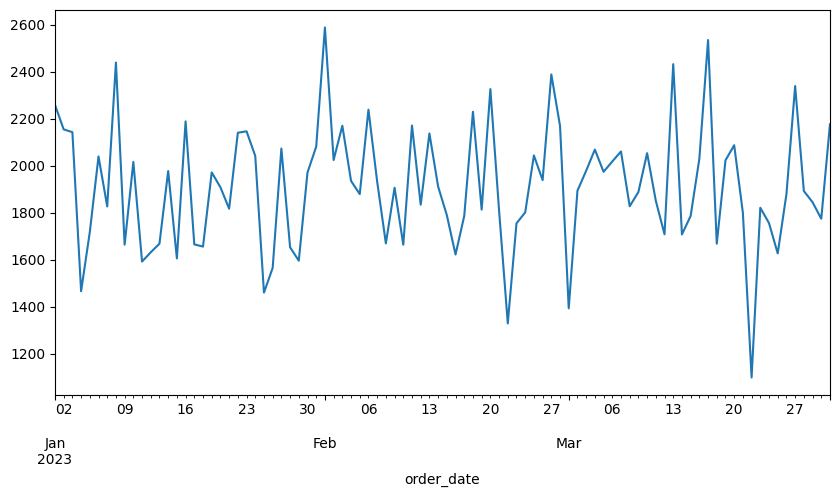

In [67]:
order_items_df['order_date'] = pd.to_datetime(order_items_df['order_date'])
order_items_df = order_items_df.set_index('order_date')
order_items_df.resample("D")["total_revenue"].sum().plot(kind="line", figsize=(10,5))

In [73]:
order_items_df["dayofweek"] = order_items_df.index.dayofweek
order_items_df["hour"] = pd.to_datetime(order_items_df.order_time).dt.hour
order_items_df.head()

<ipython-input-73-08d5d171d87b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_items_df["hour"] = pd.to_datetime(order_items_df.order_time).dt.hour


,order_details_id,order_id,order_time,item_id,item_name,category,price,sales_tax,total_revenue,dayofweek,hour
order_date,,,,,,,,,,,
2023-01-01,1,1,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,6,11
2023-01-01,2,2,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66,6,11
2023-01-01,3,2,11:57:40 AM,124.0,Spaghetti,Italian,14.50,1.16,15.66,6,11
2023-01-01,4,2,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99,6,11
2023-01-01,5,2,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74,6,11


<Axes: xlabel='dayofweek', ylabel='hour'>

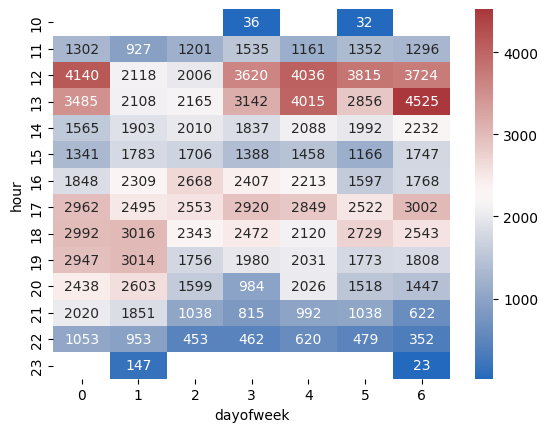

In [77]:
import seaborn as sns
sns.heatmap((order_items_df.pivot_table(index="hour", columns="dayofweek", values="total_revenue", aggfunc="sum")).round(), annot = True, fmt = "g", cmap = "vlag")

Your code analyzes sales data from two CSV files, order_details.csv and menu_items.csv, to understand sales trends and patterns.

First, you load the data into Pandas DataFrames and perform data cleaning, such as removing rows with missing values.

Then, you merge the two DataFrames based on item_id and menu_item_id to combine order details with menu information.

Next, you calculate sales_tax and total_revenue for each order.

After that, you analyze the data to identify the best and worst-selling items by grouping by item_name and aggregating total_revenue. You also visualize this information using bar charts.

Finally, you analyze sales trends over time by converting the order_date column to datetime, setting it as the index, and resampling the data by day. You also create a heatmap to visualize sales by day of the week and hour of the day.

The heatmap shows that the busiest times are Friday and Saturday evenings, with sales generally increasing throughout the day and peaking in the evening.